In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [2]:
import sys
sys.path.append('..')

from bert.go import Ontology

In [3]:
ont = Ontology(threshold=1)

In [4]:
ont.total_nodes

32372

In [5]:
swissprot_dir = '/gpfs/alpine/bie108/proj-shared/swissprot/'
swissprot = pd.read_parquet(os.path.join(swissprot_dir, 'parsed_swissprot_uniref_clusters.parquet'))
go_terms = pd.read_parquet(os.path.join(swissprot_dir, 'swissprot_quickgo.parquet'))

swissprot_annotated = swissprot[swissprot.accession.isin(go_terms['GENE PRODUCT ID'].unique())]
swissprot_annotated = swissprot_annotated[swissprot_annotated.length < 10000]

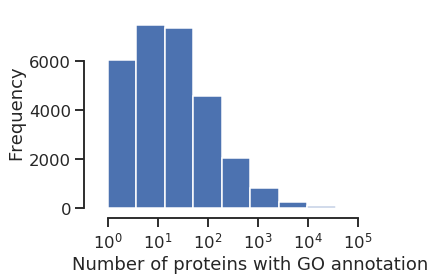

In [6]:
counts = go_terms['GO TERM'].value_counts()
np.log10(counts).plot.hist()
plt.xticks(ticks=np.arange(0, 6), labels=[f'$10^{i}$' for i in np.arange(0, 6)])
plt.xlabel('Number of proteins with GO annotation')
sns.despine(trim=True, offset=10)
plt.tight_layout()

In [7]:
head_nodes = {ont.G.nodes[ont.term_index[index]]['name']: index for index in ont.get_head_node_indices()}
head_nodes

{'biological_process': 6,
 'molecular_function': 3019,
 'cellular_component': 4569}

In [9]:
saved = np.load('/ccs/home/pstjohn/member_work/valid_pr.258061.npz')

precision_bp  = saved['precision_bp']
recall_bp     = saved['recall_bp']
thresholds_bp = saved['thresholds_bp']
precision_mf  = saved['precision_mf']
recall_mf     = saved['recall_mf']
thresholds_mf = saved['thresholds_mf']
precision_cc  = saved['precision_cc']
recall_cc     = saved['recall_cc']
thresholds_cc = saved['thresholds_cc']

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

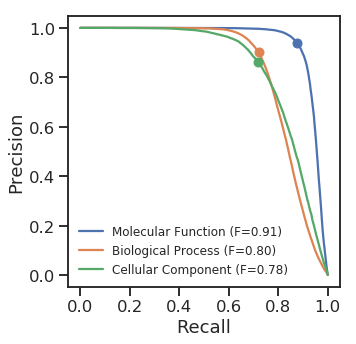

In [40]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')


def get_fmax(precision, recall):
    fscores = (2 * precision * recall / (precision + recall))
    fmax = fscores.max()
    argmax = fscores.argmax()
    return fmax, argmax

fmax, argmax = get_fmax(precision_mf, recall_mf)
ax.plot(recall_mf, precision_mf, label=f'Molecular Function (F={fmax:.2f})', color=sns.color_palette()[0])
ax.plot(recall_mf[argmax], precision_mf[argmax], 'o', color=sns.color_palette()[0])

fmax, argmax = get_fmax(precision_bp, recall_bp)
ax.plot(recall_bp, precision_bp, label=f'Biological Process (F={fmax:.2f})', color=sns.color_palette()[1])
ax.plot(recall_bp[argmax], precision_bp[argmax], 'o', color=sns.color_palette()[1])

fmax, argmax = get_fmax(precision_cc, recall_cc)
ax.plot(recall_cc, precision_cc, label=f'Cellular Component (F={fmax:.2f})', color=sns.color_palette()[2])
ax.plot(recall_cc[argmax], precision_cc[argmax], 'o', color=sns.color_palette()[2])



ax.set_xticks(np.linspace(0, 1, 6, endpoint=True))
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.legend(loc='lower left', fontsize=12)

In [ ]:
data = {}
data['BP'] = nx.tree_data(BP_sub.edge_subgraph(nx.algorithms.minimum_spanning_arborescence(BP_sub).edges()), 'GO:0008150')
data['MF'] = nx.tree_data(MF_sub.edge_subgraph(nx.algorithms.minimum_spanning_arborescence(MF_sub).edges()), 'GO:0003674')
data['CC'] = nx.tree_data(CC_sub.edge_subgraph(nx.algorithms.minimum_spanning_arborescence(CC_sub).edges()), 'GO:0005575')